# Least Squares Method with Low-level API

Note: This notebook is desinged to run with CPU (no GPU) runtime.

####[LSL-01]
Import modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

####[LSL-02]
Prepare the training dateset.

In [2]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4,
                    25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12, 1])
train_x = np.array([[mon**n for n in range(0, 5)]
                    for mon in range(1, 13)])

####[LSL-03]
`train_x` contains the list $[x^0, x^1, x^2, x^3, x^4]$ for $x=1,...,12$.

In [3]:
train_x

array([[    1,     1,     1,     1,     1],
       [    1,     2,     4,     8,    16],
       [    1,     3,     9,    27,    81],
       [    1,     4,    16,    64,   256],
       [    1,     5,    25,   125,   625],
       [    1,     6,    36,   216,  1296],
       [    1,     7,    49,   343,  2401],
       [    1,     8,    64,   512,  4096],
       [    1,     9,    81,   729,  6561],
       [    1,    10,   100,  1000, 10000],
       [    1,    11,   121,  1331, 14641],
       [    1,    12,   144,  1728, 20736]])

####[LSL-04]
`train_t` contins the corresponding lables for $x=1,...,12$.

In [4]:
train_t

array([[ 5.2],
       [ 5.7],
       [ 8.6],
       [14.9],
       [18.2],
       [20.4],
       [25.5],
       [26.4],
       [22.8],
       [17.5],
       [11.1],
       [ 6.6]])

####[LSL-06]
Definie variables for weights.

In [5]:
w = tf.Variable(tf.zeros([5, 1]))

####[LSL-07]
Definie a ploynomial to predict label values.

In [6]:
y = lambda x, w: tf.matmul(x, w)

####[LSL-09]
Definine a loss function as Square error.

In [7]:
loss = lambda x, w, t: tf.reduce_sum(tf.square(y(x, w) - t))

####[LSL-10]
Define an optimization step  using the Adam optimizer

In [8]:
optimizer = tf.keras.optimizers.Adam()

@tf.function
def train_step(x, w, t):
    with tf.GradientTape() as tape:
        loss_val = loss(x, w, t)
    grads = tape.gradient(loss_val, [w])
    optimizer.apply_gradients(zip(grads, [w]))

    return loss_val

####[LSL-12]
Apply the optimization step for 100,000 epochs.

In [9]:
%%time
train_x = train_x.astype(dtype='float32')
train_t = train_t.astype(dtype='float32')

i = 0
for _ in range(100000):
    i += 1
    loss_val = train_step(train_x, w, train_t)
    if i % 10000 == 0:
        print (f'Step: {i}, Loss: {loss_val}')

Step: 10000, Loss: 31.0147705078125
Step: 20000, Loss: 29.293682098388672
Step: 30000, Loss: 28.025081634521484
Step: 40000, Loss: 26.85442543029785
Step: 50000, Loss: 31.778268814086914
Step: 60000, Loss: 24.765493392944336
Step: 70000, Loss: 23.83963394165039
Step: 80000, Loss: 22.977985382080078
Step: 90000, Loss: 22.173564910888672
Step: 100000, Loss: 21.43476104736328
CPU times: user 1min 39s, sys: 3.64 s, total: 1min 43s
Wall time: 1min 44s


####[LSL-13]
Show weights after the training.

In [10]:
ws = w.numpy()
ws

array([[ 3.765443  ],
       [-1.5903949 ],
       [ 1.7853138 ],
       [-0.20123667],
       [ 0.00536292]], dtype=float32)

####[LSL-14]
Define a function to predict values using the final weights.

In [11]:
def predict(x):
    pred = sum([ws[n][0] * x**n for n in range(0, 5)])
    return pred

####[LSL-15]
Plot a chart for predictions.

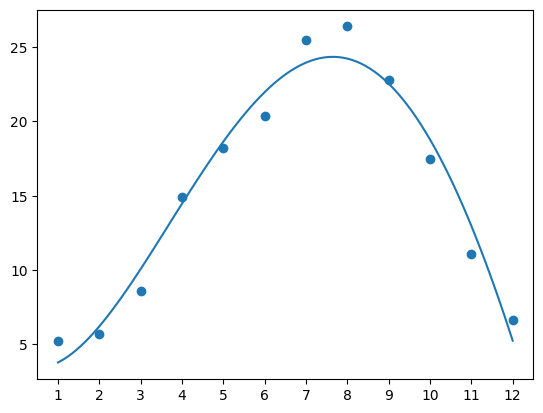

In [12]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(0.5, 12.5)
subplot.set_xticks(range(1, 13))
subplot.scatter(range(1, 13), train_t)
xs = np.linspace(1, 12, 100)
ys = predict(xs)
_ = subplot.plot(xs, ys)